In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [ ]:
from afinn import Afinn
from textblob import TextBlob

In [2]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [3]:
# converting it in numerical data - # Countvectorizer, TFIDF

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import warnings

warnings.filterwarnings('ignore')


In [5]:
amazon = pd.read_csv('Amazon_Review_CleanData.csv')

amazon.head()

,title,rating,body,clean_review
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...


In [8]:
amazon['rating'].value_counts()

1.0    1287
5.0    1243
4.0    1162
3.0     810
2.0     498
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

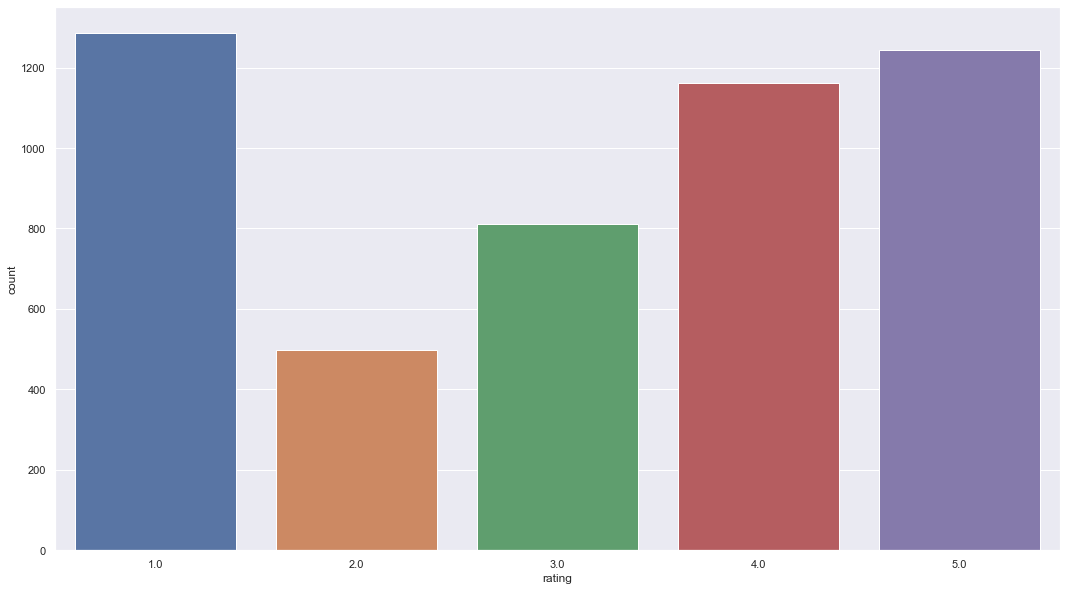

In [10]:
plt.figure(figsize=(18,10))

sns.countplot(x = amazon['rating'], data = amazon)

In [13]:
amazon['clean_review'] = amazon['clean_review'].apply(lambda x:str(x))

### Sentiment Analysis with AFINN Lexicon

In [11]:
from afinn import Afinn
af = Afinn()


In [14]:
amazon['af_sentiment'] = amazon['clean_review'].apply(lambda x: af.score(x))
amazon.head()

,title,rating,body,clean_review,af_sentiment
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...,10.0
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...,0.0
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...,22.0
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...,34.0
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...,1.0


<AxesSubplot:xlabel='af_sentiment'>

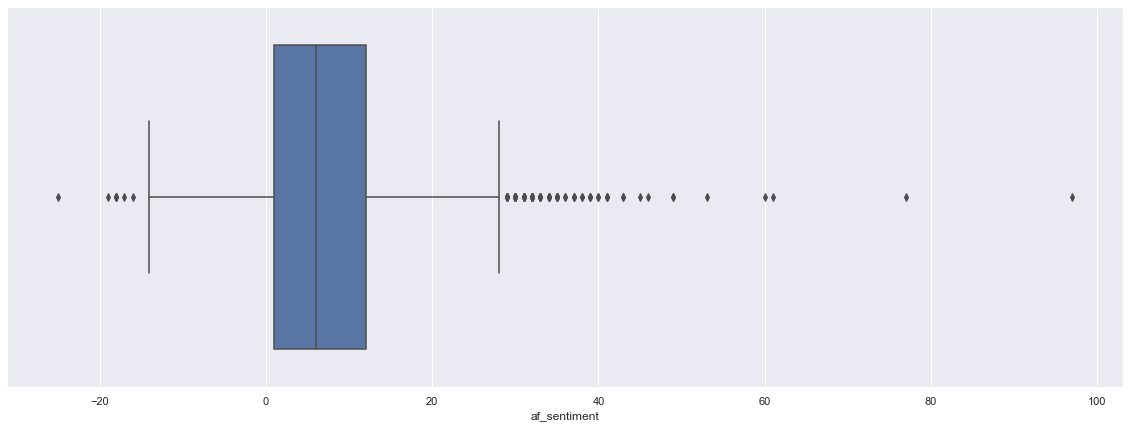

In [15]:
plt.figure(figsize=(20,7))
sns.boxplot(amazon['af_sentiment'])

<AxesSubplot:xlabel='af_sentiment', ylabel='Density'>

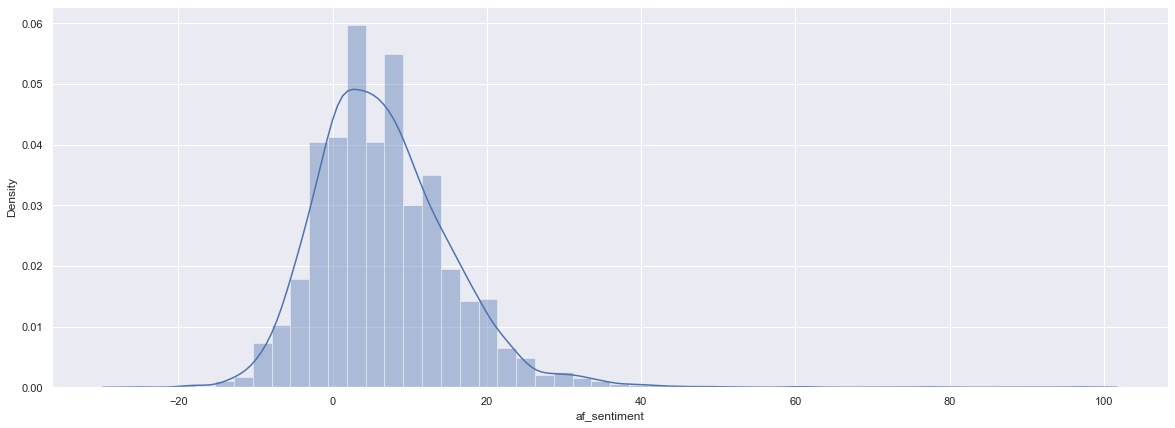

In [16]:
# we will plot the distribution 
plt.figure(figsize=(20,7))
sns.distplot(amazon['af_sentiment'])

<AxesSubplot:xlabel='af_sentiment', ylabel='count'>

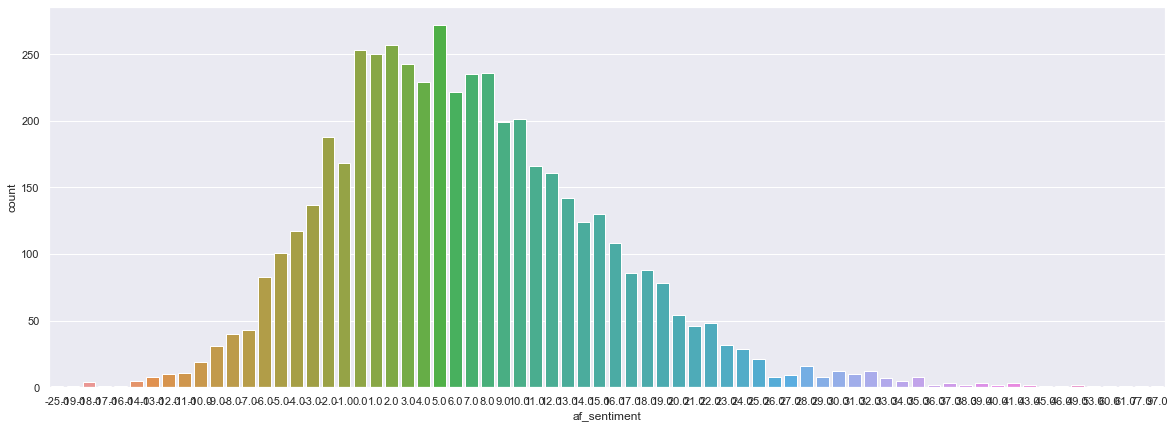

In [17]:
# we will plot the counts

plt.figure(figsize=(20,7))
sns.countplot(amazon['af_sentiment'])

### Sentiment Analysis with TextBlob Lexicon

In [18]:
from textblob import TextBlob

In [21]:
amazon['tb_polarity'] = amazon['clean_review'].apply(lambda x : round(TextBlob(x).sentiment.polarity,3))

In [22]:
amazon.head(10)

,title,rating,body,clean_review,af_sentiment,tb_polarity
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...,10.0,0.377
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...,0.0,0.061
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...,22.0,0.536
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...,34.0,0.134
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...,1.0,0.136
5,धांसू Bass & जबरदस्त Battery.,4.0,"Hey Guys,,,,,,, it's Value for money if you ge...",hey guy value money get bass quite good thumpi...,17.0,0.140
6,Just Awesome Wireless Headphone under 1000...😉,5.0,Its Awesome... Good sound quality & 8-9 hrs ba...,awesome good sound quality hr battery life waw...,6.0,0.250
7,stopped working in just 14 days,1.0,Its sound quality is adorable. overall it was ...,sound quality adorable overall good week stopp...,7.0,0.400
8,Great sound with worst mic.,3.0,After one month usage reviewing this .Pros-1- ...,one month usage reviewing pro sound quality de...,-1.0,-0.067
9,Very very bad Durabity,1.0,The product durability is 1 month..I just lost...,product durability month lost bill detail cant...,-4.0,-0.300


In [23]:
amazon.groupby(amazon['rating'])['tb_polarity'].mean()

rating
1.0   -0.008341
2.0    0.118048
3.0    0.192631
4.0    0.298989
5.0    0.350608
Name: tb_polarity, dtype: float64

Text(0, 0.5, 'Average polarity')

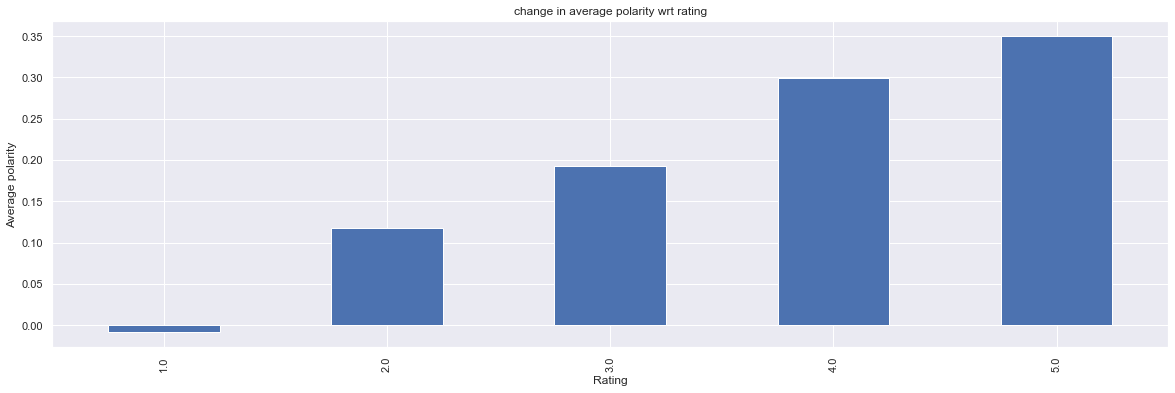

In [25]:
plt.figure(figsize=(20,6))
amazon.groupby(amazon['rating'])['tb_polarity'].mean().plot(kind = 'bar')

plt.title('change in average polarity wrt rating')
plt.xlabel('Rating')
plt.ylabel('Average polarity')

<AxesSubplot:xlabel='tb_polarity', ylabel='Density'>

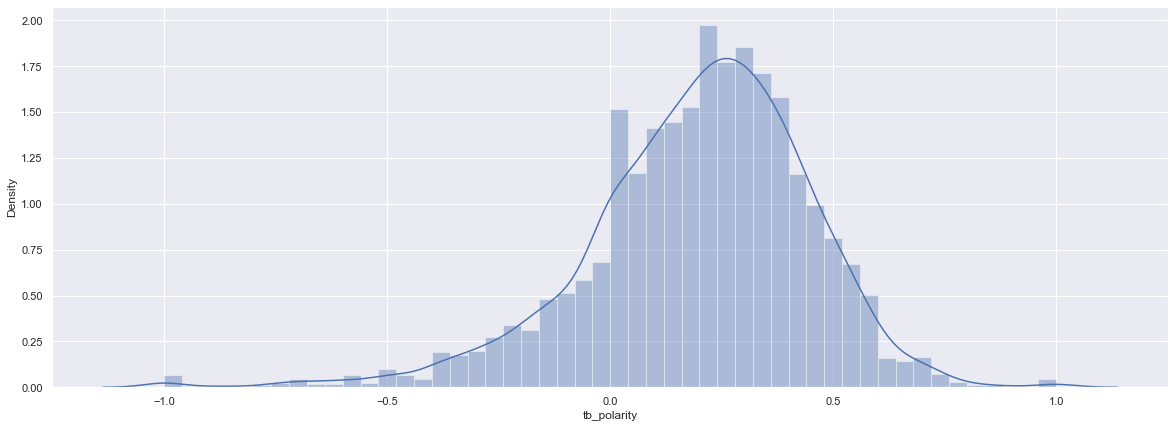

In [26]:
# we will plot the distribution of Polarity

plt.figure(figsize=(20,7))
sns.distplot(amazon['tb_polarity'])


In [29]:
### Sorting top 10 Reviews based on Polarity


amazon.sort_values(by='tb_polarity', ascending=False)[:10]

,title,rating,body,clean_review,af_sentiment,tb_polarity
3763,"Good product, better service.",4.0,This is the best Bluetooth Earphone at this pr...,best bluetooth earphone price plus get year wa...,4.0,1.0
221,Just go for it,5.0,Awesome best budget wireless earphones,awesome best budget wireless earphone,7.0,1.0
4817,Value for money,5.0,Excellent headphones that stay around your nec...,excellent headphone stay around neck need ear,3.0,1.0
4491,Nice product👍,4.0,Is the best in this price range. The only thin...,best price range thing add magnetic bt neck ba...,10.0,1.0
2956,Best product for this price,5.0,If you manage to get these under 1400 they are...,manage get best buy find k go sony one,3.0,1.0
4287,I like this product due to bettry backup is best.,5.0,The media could not be loaded.\n ...,medium could loaded bettry backup almost hour ...,10.0,1.0
4294,Best Product. boAT Naam Hi Kafi Hai 👍,5.0,This Product Gives What It commits... i.e. 40 ...,product give commits e hr battery backup else ...,4.0,1.0
2912,Best,5.0,Backup is best when I use less it gave me upto...,backup best use le gave upto daysand used hr p...,6.0,1.0
3855,Excellent,5.0,Deadpool versus excellent the best quality the...,deadpool versus excellent best quality voice c...,10.0,1.0
1805,Just Awesome😘❤,5.0,The media could not be loaded.\n ...,medium could loaded got product bcos offer roc...,6.0,0.9


In [30]:
### Sorting negative top 10 Reviews based on Polarity


amazon.sort_values(by='tb_polarity', ascending=True)[:10]

,title,rating,body,clean_review,af_sentiment,tb_polarity
4336,Battery drain and bad customers support serv...,1.0,Wrost productWithin 10 days noticed defectedBa...,wrost productwithin day noticed defectedbatter...,-1.0,-1.0
1716,Be careful when you purchase during sale.,1.0,The worst product in the category. I don't kno...,worst product category know whether rec defect...,-3.0,-1.0
4172,Don't Buy this Product,1.0,I bought this product on Mar since 2 months Ea...,bought product mar since month earphone death ...,-5.0,-1.0
3945,Big time cheaters,1.0,Twice the product after a months use started s...,twice product month use started showing proble...,-4.0,-1.0
4095,Worst earphones,1.0,I bought 2 same earphones and both of those go...,bought earphone got stopped working year produ...,-3.0,-1.0
4182,Highly not recommended,1.0,Worst quality have been using for 9 months and...,worst quality using month th time one side sto...,-2.0,-1.0
4739,Worst & faulty product and no service,1.0,This is worst product and don't buy it. Withi...,worst product buy within month faced speaker i...,-9.0,-1.0
3981,Don't buy.,1.0,Within 6 months of my purchase the head phone ...,within month purchase head phone stopped worki...,1.0,-1.0
2208,Automatically disconnected,1.0,I don't like these Bluetooth because they are ...,like bluetooth creating problem automatically ...,-8.0,-1.0
2953,Do not buy...go with oneplus,1.0,Totally worst product...i bought on 28 dec 202...,totally worst product bought dec nd th feb alm...,-3.0,-1.0


In [31]:
# Binary Classification

def class_pol(polarity):
    
    if polarity >=0:
        return 'Positive'
    else:
        return 'Negative'

In [32]:
amazon['Bi_Sentiment'] = amazon['tb_polarity'].apply(class_pol)

In [33]:
amazon.head(10)

,title,rating,body,clean_review,af_sentiment,tb_polarity,Bi_Sentiment
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...,10.0,0.377,Positive
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...,0.0,0.061,Positive
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...,22.0,0.536,Positive
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...,34.0,0.134,Positive
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...,1.0,0.136,Positive
5,धांसू Bass & जबरदस्त Battery.,4.0,"Hey Guys,,,,,,, it's Value for money if you ge...",hey guy value money get bass quite good thumpi...,17.0,0.140,Positive
6,Just Awesome Wireless Headphone under 1000...😉,5.0,Its Awesome... Good sound quality & 8-9 hrs ba...,awesome good sound quality hr battery life waw...,6.0,0.250,Positive
7,stopped working in just 14 days,1.0,Its sound quality is adorable. overall it was ...,sound quality adorable overall good week stopp...,7.0,0.400,Positive
8,Great sound with worst mic.,3.0,After one month usage reviewing this .Pros-1- ...,one month usage reviewing pro sound quality de...,-1.0,-0.067,Negative
9,Very very bad Durabity,1.0,The product durability is 1 month..I just lost...,product durability month lost bill detail cant...,-4.0,-0.300,Negative


In [35]:
amazon[amazon['tb_polarity'] == 0].shape

(127, 7)

In [36]:
amazon['Bi_Sentiment'].value_counts()

Positive    4151
Negative     849
Name: Bi_Sentiment, dtype: int64

<AxesSubplot:xlabel='Bi_Sentiment', ylabel='count'>

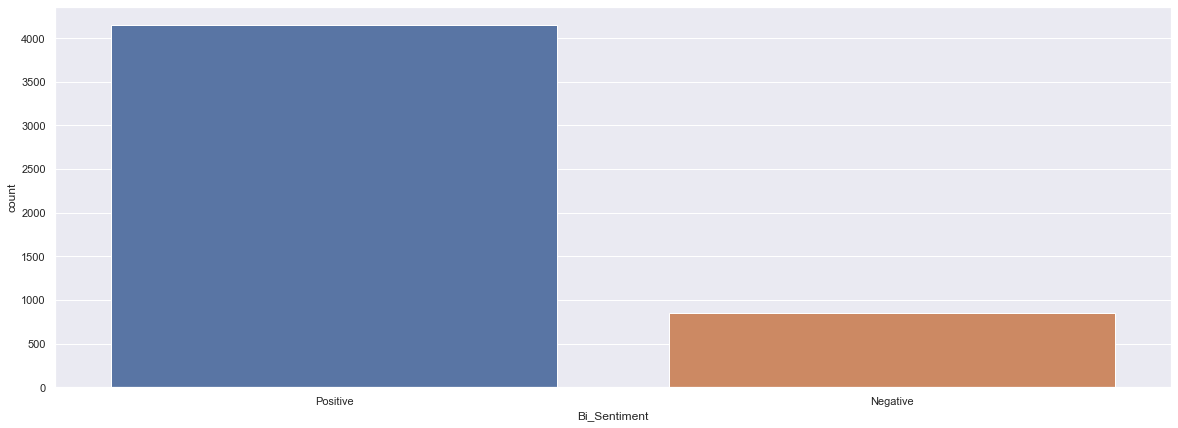

In [37]:
plt.figure(figsize=(20,7))

sns.countplot(amazon['Bi_Sentiment'])

In [38]:
# Multi Class Classification

def class_polarity(polarity):
    
    if polarity < 0:
        return 'Negative'
    elif polarity < 0.25:
        return 'Neutral'
    else:
        return 'Positive'

In [39]:
amazon['Mul_Sentiment'] = amazon['tb_polarity'].apply(class_polarity)

In [40]:
amazon.head(10)

,title,rating,body,clean_review,af_sentiment,tb_polarity,Bi_Sentiment,Mul_Sentiment
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...,10.0,0.377,Positive,Positive
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...,0.0,0.061,Positive,Neutral
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...,22.0,0.536,Positive,Positive
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...,34.0,0.134,Positive,Neutral
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...,1.0,0.136,Positive,Neutral
5,धांसू Bass & जबरदस्त Battery.,4.0,"Hey Guys,,,,,,, it's Value for money if you ge...",hey guy value money get bass quite good thumpi...,17.0,0.140,Positive,Neutral
6,Just Awesome Wireless Headphone under 1000...😉,5.0,Its Awesome... Good sound quality & 8-9 hrs ba...,awesome good sound quality hr battery life waw...,6.0,0.250,Positive,Positive
7,stopped working in just 14 days,1.0,Its sound quality is adorable. overall it was ...,sound quality adorable overall good week stopp...,7.0,0.400,Positive,Positive
8,Great sound with worst mic.,3.0,After one month usage reviewing this .Pros-1- ...,one month usage reviewing pro sound quality de...,-1.0,-0.067,Negative,Negative
9,Very very bad Durabity,1.0,The product durability is 1 month..I just lost...,product durability month lost bill detail cant...,-4.0,-0.300,Negative,Negative


In [41]:
amazon['Mul_Sentiment'].value_counts()

Positive    2273
Neutral     1878
Negative     849
Name: Mul_Sentiment, dtype: int64

<AxesSubplot:xlabel='Mul_Sentiment', ylabel='count'>

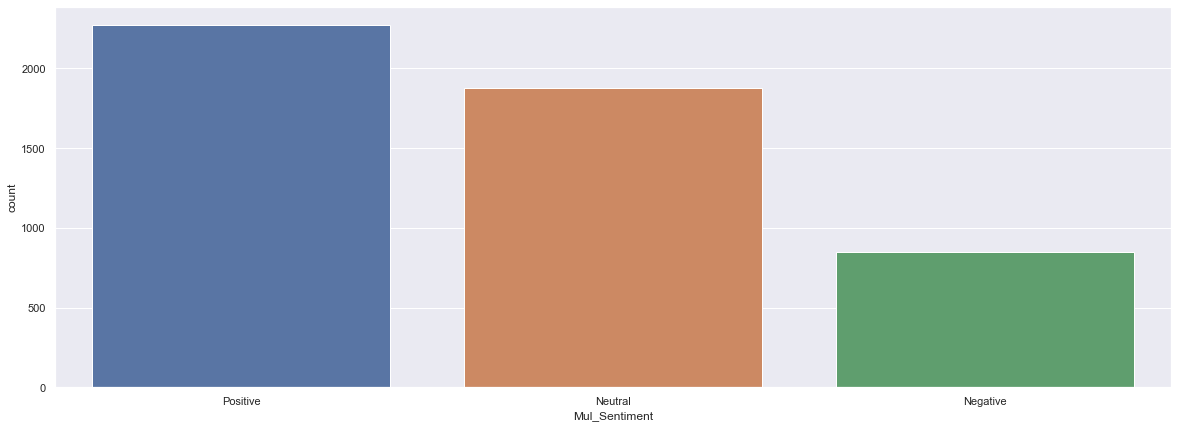

In [42]:
plt.figure(figsize=(20,7))

sns.countplot(amazon['Mul_Sentiment'])

In [43]:
amazon.to_csv('Sentiment_data.csv', index= False)